In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sp
import pandas as pd

In [2]:
def midpoint(left, right):
    return (left+right)/2.

def bisection(f, a, b, resolution, show_iters=False):
    left = a
    right = b
    midpt = midpoint(left, right)
    iters = 0
    assert (f(left)*f(right))<0, "Can't use the bisection method - zero or even number of crossings"
    while (right-midpt) > resolution:
        iters += 1
        if (f(left)*f(midpt)) <= 0: #crossing occurred
            right = midpt
        else:
            left = midpt
        midpt = midpoint(left, right)
    if show_iters:
        print('Iterations:', iters)
    return midpt

In [3]:
def f(x):
    return 5*np.exp(-x) + x - 5 
b=bisection(f, 4, 6, 1e-10)
wien = (sp.h*sp.c)/(sp.Boltzmann*b)


In [4]:
stars = np.array(['Sun', 'Betelgeuse', 'Rigel', 'Bellatrix', 'Mintaka', 'Saiph'])
temp_data = np.array([5800, 3500, 11000, 22000, 31800, 26500])
peak_wavelength = (wien/temp_data)*10**9

In [15]:
temp_range=np.arange(3500,31800,1)
lambdas=(wien/temp_range)*10**9


In [21]:
lambdas=np.arange(380,750,1)
temp_range= wien*10**9/lambdas

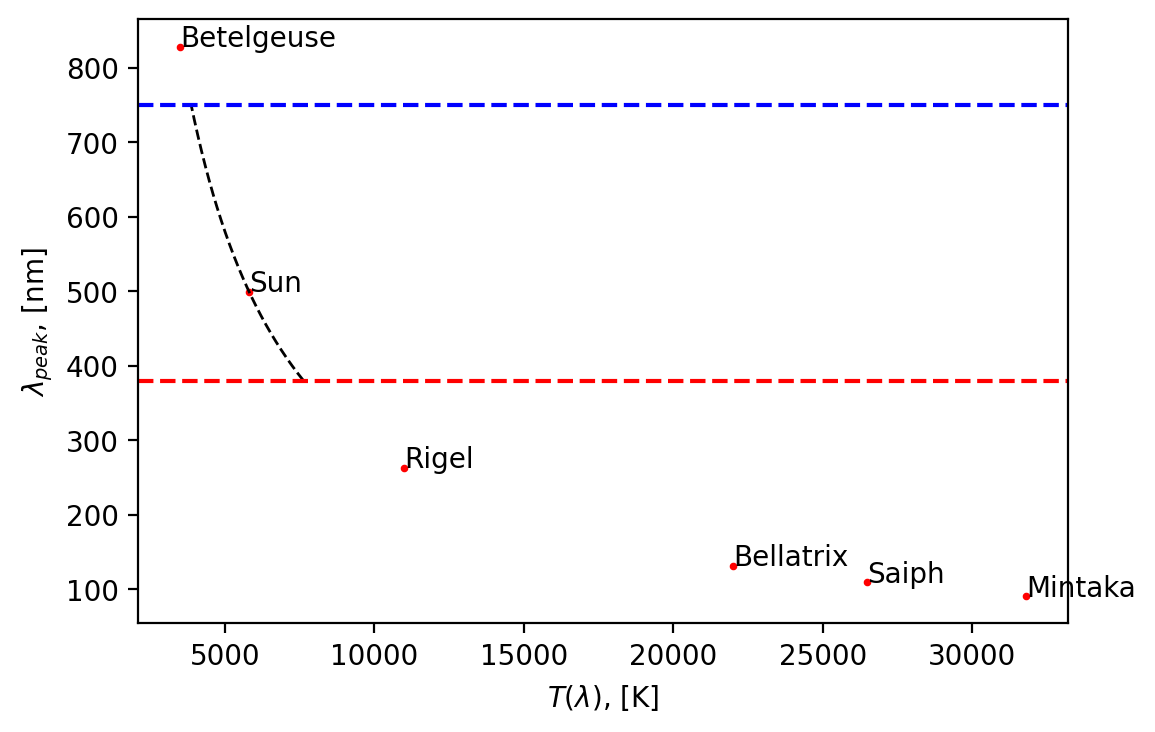

In [24]:
plt.rcParams['figure.dpi'] = 200 
plt.scatter(temp_data, peak_wavelength, s=3, color='red')
plt.plot(temp_range, lambdas, linewidth=1, color='black', linestyle='dashed')
for i in range(len(stars)):
    plt.annotate(stars[i], (temp_data[i], peak_wavelength[i])) 
plt.axhline(y = 380, color = 'r', linestyle = 'dashed')
plt.axhline(y = 750, color = 'b', linestyle = 'dashed')
plt.ylabel(r'$\lambda_{peak}$, [nm]')
plt.xlabel(r'$T(\lambda)$, [K]')
plt.savefig('wien curve.png', dpi=300)